# Module 02_02: SVC: targeting CPU and Patching 

![Assets/SVCacceleration.jpg](Assets/svcPlot.png)


# Learning Objectives:

1) Describe how to surgically unpatch specific optimized functions if needed
2) Describe differences in patching more globally versus more surgically
1) applied patching to SVC algorithm
2) Describe acceleration for the covtype dataset usinf SVC



# Scikit-learn breast Cancer Dataset
Fetch the Data

- [Back to Sections](#Back_to_Sections)


In [1]:
from sklearnex import unpatch_sklearn, patch_sklearn
unpatch_sklearn()

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

# Explore the Data

In [3]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


(569, 30)

In [4]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Split the data

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


In [6]:
#Import svm model
unpatch_sklearn()
from sklearn import svm
import time

start = time.time()
#Create a svm Classifier

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
end = time.time()
print(f"Elapsed: {end-start:.2f}")
#Predict the response for test dataset
start = time.time()
y_pred = clf.predict(X_test)
end = time.time()
print(f"Elapsed: {end-start:.2f}")

Elapsed: 0.98
Elapsed: 0.00


In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


# Plot the data

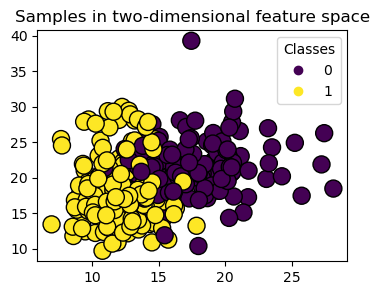

In [8]:
# Plotting settings
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))
#x_min, x_max, y_min, y_max = -3, 3, -3, 3
#ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], s=150, c=y_train, label=y_train, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

# Too many Dimensions

Reduce with PCA, for now fit on X_train only

In [9]:
import numpy as np
from sklearn.decomposition import PCA
start = time.time()
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(X_train)
end = time.time()
print(f"Elapsed: {end-start:.2f}")
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

start = time.time()
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
end = time.time()
print(f"Elapsed: {end-start:.2f}")


Elapsed: 0.01
[0.98058807 0.01739502]
[13605.14635115  1812.05911283]
Elapsed: 0.00


In [10]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(PCA_X_train, y_train)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(4, 3))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": PCA_X_test, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(PCA_X_test[:, 0], PCA_X_test[:, 1], c=y_test, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

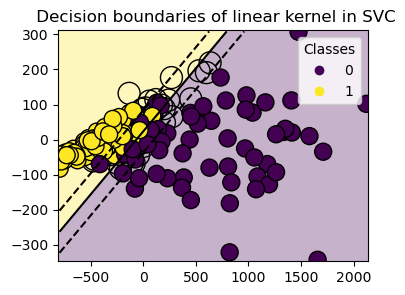

In [11]:
plot_training_data_with_decision_boundary("linear")

In [12]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train) 
y_pred = clf.predict(X_test) #Predict on CPU
end = time.time()

print(f"Elapsed: {end-start:.2f}")

Elapsed: 0.12


# Exercise:

Apply patch below

In [13]:
#Import svm model
from sklearn.metrics import classification_report

# Apply the patch_sklearn() function to this cell then run the cell and note the time:

###############################
## add patch here ##
patch_sklearn()
###############################

import numpy as np
from sklearn.decomposition import PCA
start = time.time()
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(X_train)
end = time.time()
print(f"Elapsed: {end-start:.2f}")
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

start = time.time()
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
end = time.time()
print(f"Elapsed: {end-start:.2f}")

Elapsed: 0.00
[0.98058807 0.01739502]
[13605.14635115  1812.05911283]
Elapsed: 0.09


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [14]:


from sklearn import svm
import time

start = time.time()
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
end = time.time()
print(f"Elapsed: {end-start:.2f}")
#Predict the response for test dataset
start = time.time()
y_pred = clf.predict(X_test)
end = time.time()
print(f"Elapsed: {end-start:.2f}")

Elapsed: 1.99
Elapsed: 0.00


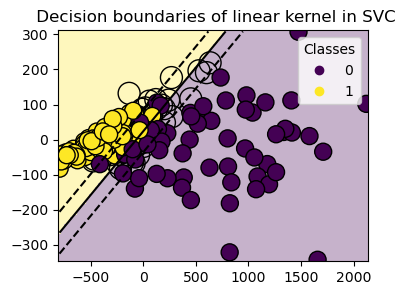

In [15]:
plot_training_data_with_decision_boundary("linear")

In [16]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train) 
y_pred = clf.predict(X_test) #Predict on CPU
end = time.time()

print(f"Elapsed: {end-start:.2f}")

Elapsed: 0.01


# Observations

Observe any differences in acceleration with patching on versus off for the two algorithms.
- Did SVC speed up under patching for this dataset?
- Did Random Forest speed up under patching for this dataset?

As we saw in chapter one in notebook, 02_sklearnex_Motivation_Acceleration.ipynb, SVC can be accerlated to a high degree for some datasets. The nature of this Breast Cancer dataset is one rare instance where we have not seen a performance boost from this library with patching.

# Summary:

You have:

1) applied patching to SVC algorithm
2) Describe acceleration for tehe covtype dataset
    

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.

In [17]:
print("All Done")

All Done
